In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd


In [2]:
# Load the CSV file
ipl_df = pd.read_csv("ipl_matches_summary.csv")

# Display basic info
print(ipl_df.info())

# Show first few rows
ipl_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   match_id         1102 non-null   int64  
 1   season           1102 non-null   object 
 2   city             1051 non-null   object 
 3   date             1102 non-null   object 
 4   venue            1102 non-null   object 
 5   team_1           1102 non-null   object 
 6   team_2           1102 non-null   object 
 7   toss_winner      1102 non-null   object 
 8   toss_decision    1102 non-null   object 
 9   match_winner     1083 non-null   object 
 10  player_of_match  1097 non-null   object 
 11  umpire_1         0 non-null      float64
 12  umpire_2         0 non-null      float64
dtypes: float64(2), int64(1), object(10)
memory usage: 112.1+ KB
None


,match_id,season,city,date,venue,team_1,team_2,toss_winner,toss_decision,match_winner,player_of_match,umpire_1,umpire_2
0,335982,2007/08,Bangalore,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,BB McCullum,NaN,NaN
1,335983,2007/08,Chandigarh,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,MEK Hussey,NaN,NaN
2,335984,2007/08,Delhi,2008-04-19,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,MF Maharoof,NaN,NaN
3,335986,2007/08,Kolkata,2008-04-20,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,DJ Hussey,NaN,NaN
4,335985,2007/08,Mumbai,2008-04-20,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,MV Boucher,NaN,NaN


In [3]:
# Convert date column to datetime format
ipl_df['date'] = pd.to_datetime(ipl_df['date'], errors='coerce')

# Extract year from date
ipl_df['year'] = ipl_df['date'].dt.year

# Filter data for last 5 years (2019-2023)
ipl_recent = ipl_df[ipl_df['year'].between(2019, 2023)]

# Handle missing values (if any)
ipl_recent.fillna("Unknown", inplace=True)

# Show cleaned data
ipl_recent.head()


C:\Users\Hp\AppData\Local\Temp\ipykernel_13032\2975429233.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ipl_recent.fillna("Unknown", inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_13032\2975429233.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_recent.fillna("Unknown", inplace=True)


,match_id,season,city,date,venue,team_1,team_2,toss_winner,toss_decision,match_winner,player_of_match,umpire_1,umpire_2,year
610,1175356,2019,Chennai,2019-03-23,MA Chidambaram Stadium,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,Harbhajan Singh,Unknown,Unknown,2019
611,1175357,2019,Kolkata,2019-03-24,Eden Gardens,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,AD Russell,Unknown,Unknown,2019
612,1175358,2019,Mumbai,2019-03-24,Wankhede Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,Delhi Capitals,RR Pant,Unknown,Unknown,2019
613,1175359,2019,Jaipur,2019-03-25,Sawai Mansingh Stadium,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,Kings XI Punjab,CH Gayle,Unknown,Unknown,2019
614,1175360,2019,Delhi,2019-03-26,Arun Jaitley Stadium,Delhi Capitals,Chennai Super Kings,Delhi Capitals,bat,Chennai Super Kings,SR Watson,Unknown,Unknown,2019


C:\Users\Hp\AppData\Local\Temp\ipykernel_13032\1492717447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette="viridis")


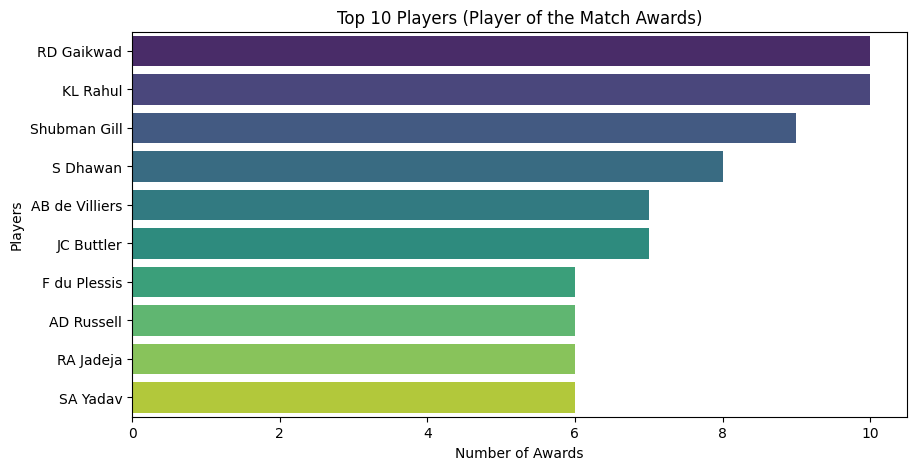

In [4]:
# Count player of match awards
top_players = ipl_recent['player_of_match'].value_counts().head(10)

# Plot top players
plt.figure(figsize=(10, 5))
sns.barplot(x=top_players.values, y=top_players.index, palette="viridis")
plt.xlabel("Number of Awards")
plt.ylabel("Players")
plt.title("Top 10 Players (Player of the Match Awards)")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_13032\2859629957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.index, y=team_wins.values, palette="coolwarm")


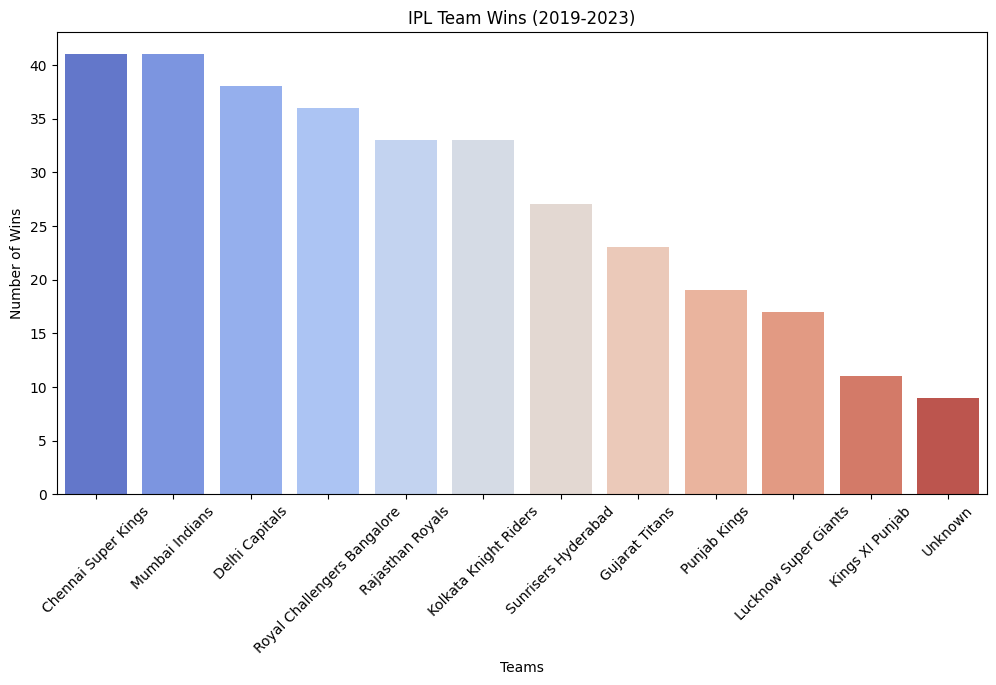

In [5]:
# Count match wins per team
team_wins = ipl_recent['match_winner'].value_counts()

# Plot team wins
plt.figure(figsize=(12, 6))
sns.barplot(x=team_wins.index, y=team_wins.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.title("IPL Team Wins (2019-2023)")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_13032\1963676664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=venue_counts.values, y=venue_counts.index, palette="magma")


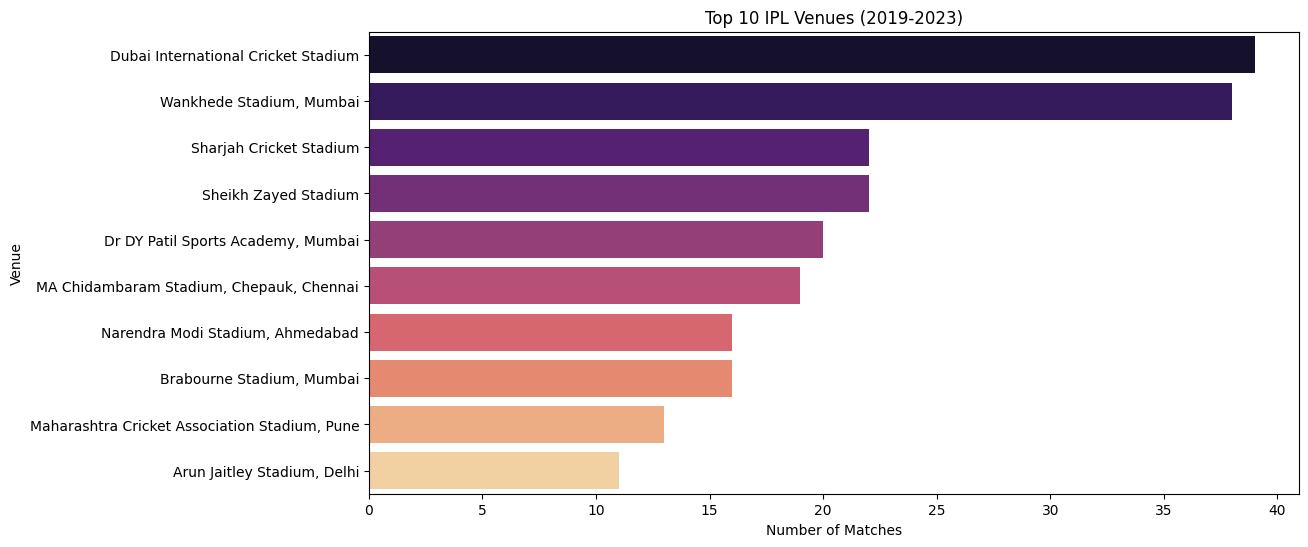

In [6]:
# Count matches played at each venue
venue_counts = ipl_recent['venue'].value_counts().head(10)

# Plot venue analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=venue_counts.values, y=venue_counts.index, palette="magma")
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.title("Top 10 IPL Venues (2019-2023)")
plt.show()


In [7]:
# Compare toss winners vs match winners
toss_wins = ipl_recent[ipl_recent['toss_winner'] == ipl_recent['match_winner']]

# Calculate percentage of matches where toss winner also won
toss_impact = len(toss_wins) / len(ipl_recent) * 100
print(f"Toss Winning Impact on Match Outcome: {toss_impact:.2f}%")


Toss Winning Impact on Match Outcome: 49.70%


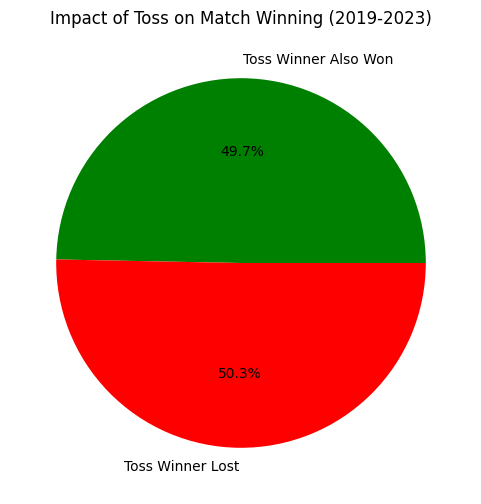

In [8]:
# Calculate Toss Winning Impact
toss_wins = ipl_recent[ipl_recent['toss_winner'] == ipl_recent['match_winner']]
toss_impact = [len(toss_wins), len(ipl_recent) - len(toss_wins)]

# Plot Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(toss_impact, labels=["Toss Winner Also Won", "Toss Winner Lost"], autopct="%1.1f%%", colors=["green", "red"])
plt.title("Impact of Toss on Match Winning (2019-2023)")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_13032\2159092692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="year", y="toss_decision", data=ipl_recent, palette="coolwarm")


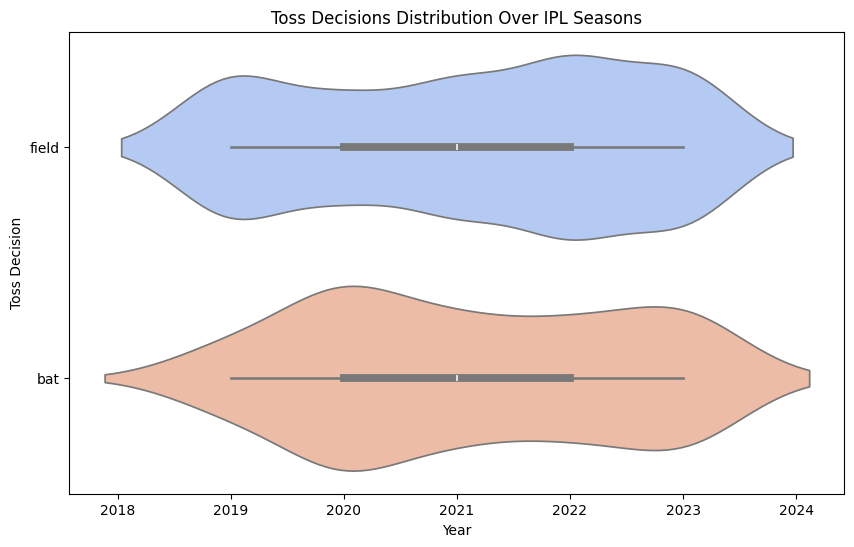

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="year", y="toss_decision", data=ipl_recent, palette="coolwarm")
plt.xlabel("Year")
plt.ylabel("Toss Decision")
plt.title("Toss Decisions Distribution Over IPL Seasons")
plt.show()


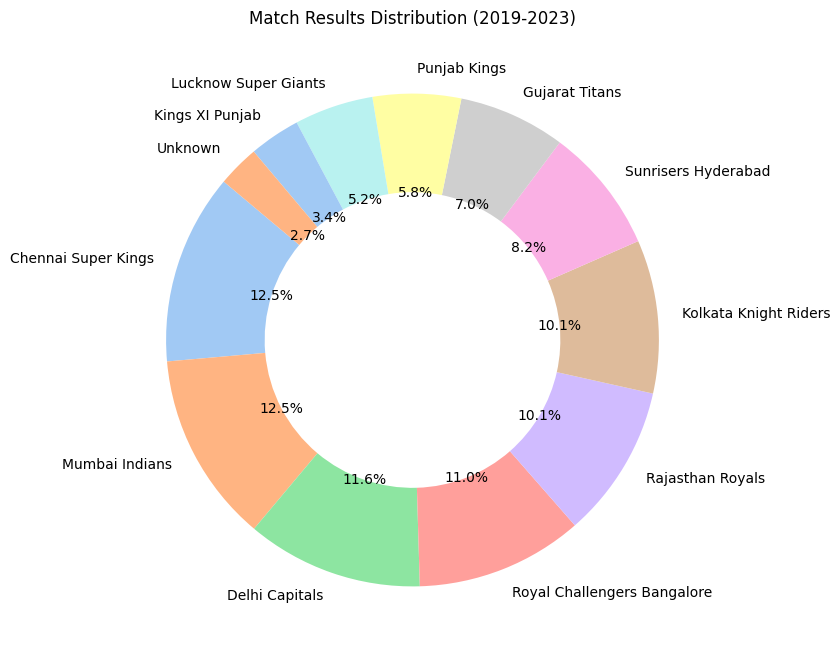

In [10]:
# Count Match Outcomes
outcome_counts = ipl_recent['match_winner'].fillna("No Result").value_counts()

# Plot Donut Chart
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"), wedgeprops=dict(width=0.4))
plt.title("Match Results Distribution (2019-2023)")
plt.show()


In [11]:
import plotly.express as px

# Ensure correct column name for year/season
year_col = "season" if "season" in ipl_recent.columns else "year"

# Group data by Year & Match Winner
wins_per_team = ipl_recent.groupby([year_col, "match_winner"]).size().reset_index(name="wins")

# Create Animated Line Chart
fig = px.line(
    wins_per_team, 
    x=year_col, 
    y="wins", 
    color="match_winner", 
    markers=True, 
    title="IPL Team Wins Trend Over 5 Seasons",
    animation_frame=year_col,
    line_shape="spline"  # Smoothens the lines
)

# 🎨 **Manually Set Animation Speed**
fig.update_layout(
    updatemenus=[{
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 1500, "redraw": True}, "fromcurrent": True}],
                "label": "▶ Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                "label": "❚❚ Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }]
)

# Improve Aesthetics
fig.update_traces(marker=dict(size=8))  # Increase marker size
fig.update_layout(
    xaxis_title="Season", 
    yaxis_title="Total Wins", 
    legend_title="Teams",
    transition={"duration": 800}  # Smooth transitions
)

fig.show()




C:\Users\Hp\AppData\Local\Temp\ipykernel_13032\3066752239.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




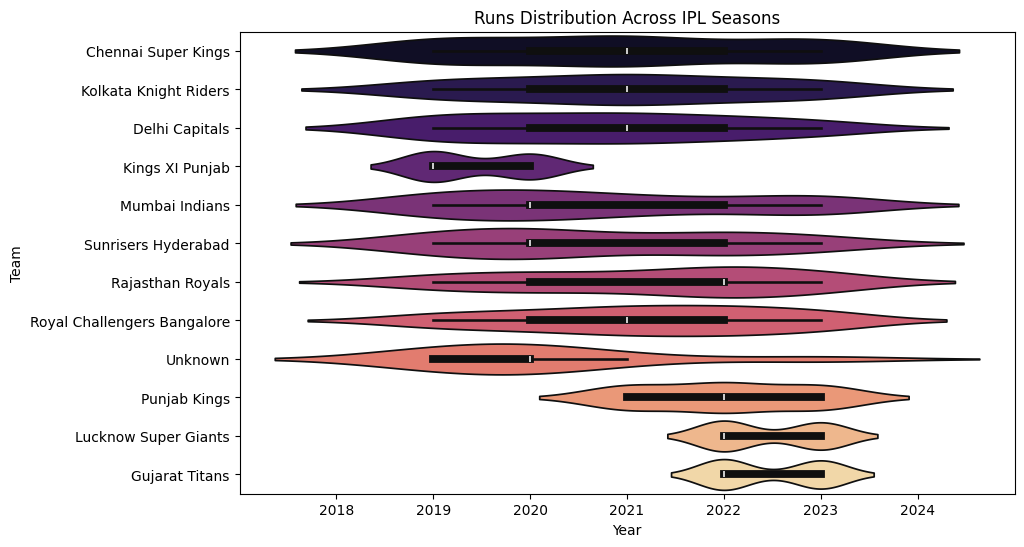

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Ridge Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="year", y="match_winner", data=ipl_recent, palette="magma")
plt.xlabel("Year")
plt.ylabel("Team")
plt.title("Runs Distribution Across IPL Seasons")
plt.show()


In [13]:
import plotly.express as px

# Aggregate Data: Count Wins per Team per Season
team_stats = ipl_recent.groupby(["season", "match_winner"]).size().reset_index(name="wins")

# Create Bubble Chart (Wins Over Time)
fig = px.scatter(
    team_stats, 
    x="season", 
    y="wins", 
    size="wins", 
    color="match_winner", 
    animation_frame="season",
    title="IPL Team Performance Over the Years (Based on Wins)",
    labels={"wins": "Total Wins", "season": "Year"},
    hover_name="match_winner",
    size_max=50
)

fig.show()


In [14]:
import plotly.express as px

# Count Wins per Team per Year
team_wins_yearly = ipl_recent.groupby(["season", "match_winner"]).size().reset_index(name="wins")

# Animated Bar Chart Race
fig = px.bar(
    team_wins_yearly, 
    x="wins", 
    y="match_winner", 
    color="match_winner",
    animation_frame="season",
    orientation="h",
    title="IPL Team Wins Over the Years (Animated Bar Chart Race)",
    labels={"wins": "Total Wins", "match_winner": "Teams"},
)

fig.update_layout(xaxis_title="Total Wins", yaxis_title="Teams")
fig.show()


In [15]:
import plotly.express as px

# Calculate Cumulative Wins
team_wins_yearly["cumulative_wins"] = team_wins_yearly.groupby("match_winner")["wins"].cumsum()

# Animated Line Chart
fig = px.line(
    team_wins_yearly, 
    x="season", 
    y="cumulative_wins", 
    color="match_winner",
    animation_frame="season",
    markers=True,
    title="Cumulative Wins by IPL Teams Over the Years",
    labels={"cumulative_wins": "Total Wins", "season": "Year"},
    line_shape="spline"  # Smooth lines
)

fig.show()


In [16]:
import plotly.express as px

# Count Matches Played Per Team
matches_per_team = ipl_recent.groupby(["season", "match_winner"]).size().reset_index(name="wins")
matches_played = ipl_recent.groupby(["season", "team_1"]).size().reset_index(name="matches")

# Merge Wins & Matches Played
team_stats = matches_per_team.merge(matches_played, left_on=["season", "match_winner"], right_on=["season", "team_1"])
team_stats.drop(columns=["team_1"], inplace=True)

# Animated Scatter Plot (Wins vs. Matches)
fig = px.scatter(
    team_stats, 
    x="matches", 
    y="wins", 
    color="match_winner",
    animation_frame="season",
    size="wins",
    title="IPL Team Wins vs. Matches Played Over the Years",
    labels={"matches": "Total Matches Played", "wins": "Total Wins"},
    size_max=50
)

fig.show()


In [17]:
import plotly.express as px

# Create a Pivot Table: Seasons vs. Teams (Total Wins)
heatmap_data = ipl_recent.groupby(["season", "match_winner"]).size().reset_index(name="wins")

# Heatmap Animation
fig = px.imshow(
    heatmap_data.pivot(index="match_winner", columns="season", values="wins"),
    color_continuous_scale="Viridis",
    title="IPL Team Performance Over Seasons (Heatmap)",
    labels=dict(x="Season", y="Teams", color="Total Wins"),
)

fig.show()


In [18]:
import plotly.express as px

# Create sample data (as runs are missing, using wins)
team_stats = ipl_recent.groupby(["season", "match_winner"]).size().reset_index(name="wins")

# 3D Scatter Plot
fig = px.scatter_3d(
    team_stats, 
    x="season", 
    y="match_winner", 
    z="wins", 
    color="match_winner", 
    size="wins",
    title="3D IPL Team Performance: Wins Across Seasons",
    labels={"season": "Year", "match_winner": "Team", "wins": "Total Wins"}
)

fig.show()


In [19]:
import plotly.express as px

# Group by Season → Team → Wins
sunburst_data = ipl_recent.groupby(["season", "match_winner"]).size().reset_index(name="wins")

# Sunburst Chart
fig = px.sunburst(
    sunburst_data, 
    path=["season", "match_winner"], 
    values="wins", 
    title="IPL Tournament Hierarchy: Wins Across Seasons",
    color="wins", 
    color_continuous_scale="Blues"
)

fig.show()
